# SGD with Momentum and Weight Decay and Adam Optimizers

## Create a sample data with two weights

- The formula is: `y = x1 * w1 + x2 * w2 + b`
    where `w1 = 0.8, w2 = -0.1 and b = 0.6`.
- Noise can be generated using np random's uniform distribution with a range of [-0.5, 0.5].
- Noise is then added to the y.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

w = np.array([0.8, -0.2])
b = 0.6

x1 = np.random.uniform(low=-10., high=10., size=(100,))
x2 = np.random.uniform(low=-10., high=10., size=(100,))
x = np.vstack((x1, x2)).T

# y = w1 * x1 + w2 * x2 + b
y = x @ w.T + b

noise = np.random.uniform(low=-.5, high=.5, size=(100,))
noisy_y = y + noise

## Create a function to train the data with SGD

In [2]:
def train_sgd(x: np.ndarray, 
              y: np.ndarray,
              epochs: int, 
              lr: float, 
              mom: float,
              weight_decay: float):

    # step 1: initialize the weight using glorot uniform initialization
    w = np.array([0.5, 0.5])
    b = 0

    # define v for momentum
    v_w = np.zeros_like(w)
    v_b = 0

    # perform the training
    loss = np.zeros(epochs)
    for epoch in range(epochs):

        # go through each example
        losses = np.zeros(x.shape[0])
        for i in range(x.shape[0]):

            # step 2: predict the y
            y_hat = x[i] @ w.T + b

            # step 3: calculate the MSE loss
            losses[i] = 0.5 * (y[i] - y_hat) ** 2

            # step 4: calculate the gradients
            dL_dyhat = y_hat - y[i]
            dL_dw = dL_dyhat * x[i]
            dL_db = dL_dyhat

            # step 5: update the weights
            v_w = mom * v_w + lr * dL_dw
            v_b = mom * v_b + lr * dL_db

            w_decay = weight_decay * lr * w

            w = w - v_w - w_decay
            b = b - v_b

        loss[epoch] = np.mean(losses)

    print(f"final loss: {np.mean(losses)}")
    return w, b, loss

## Create a function to train the data with Adam Optimizer

In [3]:
def train_adam(x: np.ndarray,
               y: np.ndarray,
               epochs: int,
               lr: float,
               rho1: float = 0.9,
               rho2: float = 0.999,
               epsilon: float = 1e-8):
    
    # step 1: initialize the weight using glorot uniform initialization
    w = np.array([0.5, 0.5])
    b = 0

    t = 0
    s_w = np.zeros_like(w)
    s_b = 0
    r_w = np.zeros_like(w)
    r_b = 0
    
    # perform the training
    loss = np.zeros(epochs)
    for epoch in range(epochs):

        t += 1

        # go through each example
        losses = np.zeros(x.shape[0])
        for i in range(x.shape[0]):

            # step 2: predict the y
            y_hat = x[i] @ w.T + b

            # step 3: calculate the MSE loss
            losses[i] = 0.5 * (y[i] - y_hat) ** 2

            # step 4: calculate the gradients
            dL_dyhat = y_hat - y[i]
            dL_dw = dL_dyhat * x[i]
            dL_db = dL_dyhat

            # step 5: update the weights
            s_w = rho1 * s_w + (1 - rho1) * dL_dw
            s_b = rho1 * s_b + (1 - rho1) * dL_db

            r_w = rho2 * r_w + (1 - rho2) * dL_dw**2
            r_b = rho2 * r_b + (1 - rho2) * dL_db**2

            st_w = s_w / (1 - rho1**t)
            st_b = s_b / (1 - rho1**t)

            rt_w = r_w / (1 - rho2**t)
            rt_b = r_b / (1 - rho2**t)

            w -= lr * st_w / np.sqrt(rt_w + epsilon)
            b -= lr * st_b / np.sqrt(rt_b + epsilon)

        loss[epoch] = np.mean(losses)

    print(f"final loss: {np.mean(losses)}")
    return w, b, loss

## Train the data

In [4]:
epochs = 20
lr = 0.01

# no momentum
sgd_learned_w, sgd_learned_b, sgd_loss = train_sgd(
    x=x,
    y=noisy_y,
    epochs=epochs,
    lr=lr, 
    mom=0,
    weight_decay=0,
)
# with momentum
sgdm_learned_w, sgdm_learned_b, sgdm_loss = train_sgd(
    x=x,
    y=noisy_y,
    epochs=epochs,
    lr=lr, 
    mom=0.5,
    weight_decay=0,
)
# adam
adam_learned_w, adam_learned_b, adam_loss = train_adam(
    x=x,
    y=noisy_y,
    epochs=epochs,
    lr=0.01,
)

final loss: 0.0547578232636525
final loss: 0.09025564528147063
final loss: 0.04258333038052417


## Output Comparisons

In [5]:
print(f"actual w:       {w}")
print(f"sgd learned w:  {sgd_learned_w}")
print(f"sgdm learned w: {sgdm_learned_w}")
print(f"adam learned w: {adam_learned_w}")
print()
print(f"actual b:       {b}")
print(f"sgd learned b:  {sgd_learned_b}")
print(f"sgdm learned b: {sgdm_learned_b}")
print(f"adam learned b: {adam_learned_b}")

# x = np.arange(start=0., stop=10., step=0.1)
y = x @ w.T + b
sgd_y_hat = sgd_learned_w * x + sgd_learned_b
sgdm_y_hat = sgdm_learned_w * x + sgdm_learned_b
adam_y_hat = adam_learned_w * x + adam_learned_b

# plt.figure(figsize=(12,10))
# plt.title('Dummy Data')
# plt.plot(x, y, color = 'black', label='actual')
# plt.plot(x, sgd_y_hat, color='blue', label='sgd')
# plt.plot(x, sgdm_y_hat, color='red', label='sgdm')
# plt.plot(x, adam_y_hat, color='green', label='adam')
# plt.scatter(x, noisy_y, color='grey')
# plt.legend()
# plt.show()

actual w:       [ 0.8 -0.2]
sgd learned w:  [ 0.81779163 -0.16656624]
sgdm learned w: [ 0.79878259 -0.13598875]
adam learned w: [ 0.80000845 -0.19468997]

actual b:       0.6
sgd learned b:  0.587701324303953
sgdm learned b: 0.6714136579418654
adam learned b: 0.5639787811441063


## Loss vs Epoch comparisons

With SGD being used as the benchmark, here are some of the observations we can see:
- Adam optimizer starts from the highest loss but quickly learns and drops to below SGD.
- Although SGD with momentum learns faster at the 1st epoch, its loss stagnates above SGD.

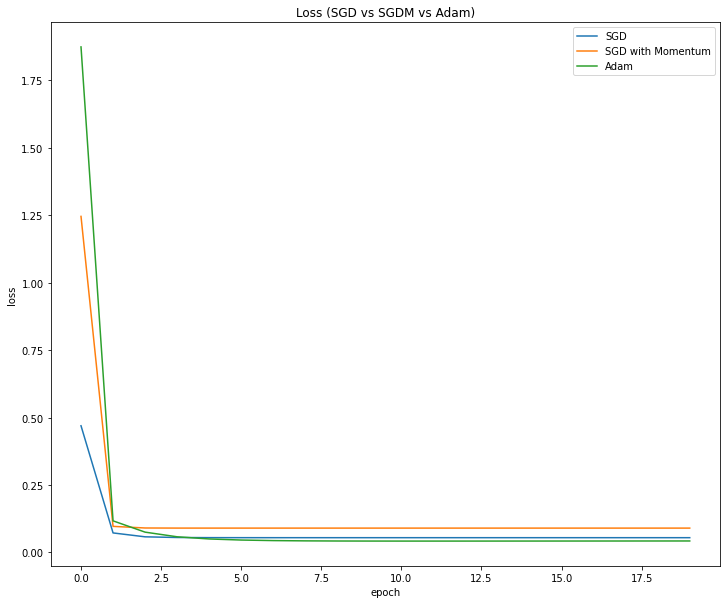

In [6]:
plt.figure(figsize=(12,10))
plt.title('Loss (SGD vs SGDM vs Adam)')
plt.plot(sgd_loss, label='SGD')
plt.plot(sgdm_loss, label='SGD with Momentum')
plt.plot(adam_loss, label='Adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()